
========GENERAL TODOS============
(OTHER TODOS ARE INSIDE THE NOTEBOOK)

1. VISULAZATION: SHOW ESTIMATE IN THE STATE WINDOW AS DASHED LINES
2. REPORT FORM LIKES IN ASGNS 1,2
2.1. TASK 1: COMPARE OUTPUT OF JACOBI MATRIX METHOD WITH THE CORRECT ONE.  POINTS 25/25
2.2. TASK 2: INTEGRAL METRIC OF STATE ESTIMATION ACCURACY. POINTS 75/75

3. IMPLEMENTED KF CLASS SHOULD BE PUSHED TO A DEV BRANCH OF RCOGNITA, SAY, RCOGNITA-DEV-KF. CALL MODULE OBSERVERS.PY. AND MAKE A PRESET TO RUN KF. MAIN_3WROBOT_KF.PY SAY (CAN DO THIS LATER ON)
4. NOTEBOOK WITH SOLUTION -> AIDA REPO
5. W/O SOLUTIONS -> AIDA-EDU

=========================




IN THIS NOTEBOOK, WE WILL IMPLEMENT AND TEST A KALMAN FILTER FOR A MOBILE ROBOT. THE CORRESPONDING DYNAMICAL MODEL READS:

--FORMULAS--

WE WILL ASSUME THE OUTPUT MODEL IN THE FOLLOWING FORM:

--FORMULA-- (ONLY XC, YC AND ALPHA ARE MEASURED)

OUR TASK IS TO RECOVER THE FORWARD AND ANGULAR SPEEDS V AND OMEGA FROM THIS OUTPUT.


<h1 style="color:#333333; text-align:center; line-height: 0;"> <img style="right;" src="logo.png" width=18% height=18%> Advanced Control | Assignment 3 
</h1>
<br/><br/>

**First, familiarize yourself with [Rcognita](https://github.com/AIDynamicAction/rcognita) if you have not already done so. This assignment is based on this framework, so it's better to have an intuition about what's going on behind the scenes.**

In this homework asgn, we will address the problem of state estimation.
The goal of the following homework is to implement and test an extended Kalman filter for a mobile robot.

___Total points:___ 100

 
<h2 style="color:#A7BD3F;"> Section 1: Introduction to Kalman Filter </h2>

Recall that, in general, there is an **observation model** which can be interpreted as **measurement**, i.e., what is outputted "from" the system to the outside world is a function of the state. In particular, the output function may return just a part of the state vector. In many control tasks, it is necessary, however, to recover the information about the full state vector. The corresponding task is called **"state estimation"** and is usually addressed by the so called state observers. Perhaps the most common state observer is a **bayesian filter** that performs estimation using bayesian inference. Roughly speaking, it seeks to maximize the likelihood of the state estimate given the observed output. A particular variant of a baeysian filter is the extended kalman filter.

***


--WRITE HERE SHORT DESCRIPTION OF KLAMA FILTER + ITS ALGORITHM !!! --

... IN GENERAL, KALMAN FILTER ASSUMES A MODEL LIKE

DOT X = F + w^x
Y = H(X) + w^y

...

-- CLEAN UP!


###  <font color="blue"> 1.0 Mathematical statement recap </font>
Consider the following system 

$$\begin{aligned}\dot{\mathbf x} &= f(\mathbf x, \mathbf u) + w_x\\
\mathbf z &= h(\mathbf x) + w_z
\end{aligned}$$

$\mathbf x$ - state from **state space** $\mathbb{X}$

$\mathbf u$ - action from **action space** $\mathbb{U}$

$\begin{cases}
\dot x_с & = v \cos \alpha \\
\dot y_с & = v \sin \alpha \\
\dot \alpha & = \omega \newline
\dot v & = \left( \frac 1 m F + q_1 \right) \\
\dot \omega & = \left( \frac 1 I M + q_2 \right)
\end{cases}$


#### Algorithm:

***

<h2 style="color:#A7BD3F;"> Section 2: Problems </h2>

In the following, for testing, we will use a system representing a three-wheeled robot described by a system of equations
$$\begin{cases}
\dot x_с & = v \cos \alpha \\
\dot y_с & = v \sin \alpha \\
\dot \alpha & = \omega \newline
\dot v & = \left( \frac 1 m F + q_1 \right) \\
\dot \omega & = \left( \frac 1 I M + q_2 \right)
\end{cases}$$ where $x_c$ and $y_c$ are coordinates of the center of mass, $v$ and $\omega$ are velocity of the center of mass and angular velocity respectively and $\alpha$ is a turning angle. $F$ and $M$ are pushing force and steering torque which we in consider the components of control $\boldsymbol u$

***

### <font color="blue"> 2.1 Preparation of environment </font>
So, let's get started! The cell below contains some imports from Rcognita submodule that was cloned into your current directory in case you did everything correctly. Execute the following code and check out you don't have any errors.

In [1]:
"""
DO NOT MODIFY
"""
import warnings
with warnings.catch_warnings(record=True):
    import extras
    import matplotlib.animation as animation
    import matplotlib.pyplot as plt
    import numpy as np
    from rcognita.rcognita import simulator
    from rcognita.rcognita import systems
    from rcognita.rcognita import controllers
    from rcognita.rcognita import loggers
    from rcognita.rcognita import visuals
    from rcognita.rcognita.utilities import on_key_press
    from rcognita.rcognita.utilities import dss_sim
    from rcognita.rcognita.utilities import rep_mat
    from rcognita.rcognita.utilities import uptria2vec
    from rcognita.rcognita.utilities import push_vec
    from scipy.optimize import minimize
    import argparse
    import scipy as sp

%matplotlib notebook
%load_ext autoreload
%autoreload 2

### Initial setup

-- SHORT EXPLANATION (A SENTENCE) --

HERE, WE WILL AUGMENT OUR 3W ROB CLASS WITH A METHOD THAT EVALUATES THE JACOBI MATRIX --FORMULA-- FOR THE SYSTEM MODEL --REF--

IT READS:

--FORMULA--

THE CODE IS BELOW:

--EXPAND AND CLEAN UP THIS EXPLANATION--

MAKE IT TO A TASK!!! 

TAKS 1: COMPUTE JACOBI MATRIX AND IMPLEMENT THE METHOD
TASK 2: IMPLEMENT AND CHECK KF

In [10]:
class Sys3WRobotLab(systems.Sys3WRobot):
    
    def Jacobi_matrix(state):
        
        xCoord = state[0]
        yCoord = state[1]
        alpha = state[2]
        v = state[3]
        omega = state[4]
        
        return np.array([
            [0, 0, -v * np.sin(alpha), np.cos(alpha), 0],
            [0, 0,  v * np.cos(alpha), np.sin(alpha), 0],
            [0, 0,  0,                     0,         1],
            [0, 0,  0,                     0,         0],
            [0, 0,  0,                     0,         0]
        ])

In [11]:
TASK 2

IMPLEMENT METHOD COMPUTE_ESTIMATE FOLLOWING THE ALGORITHM --REF--

THE FORMAT OF THE INPUT DATA IS AS FOLLOWS:
    
THE FORMAT OF THE OUTPUT DATA IS AS FOLLOWS:   

class KalmanFilter:
    def __init__(self, Jacobi_matrix, sys_noise_cov, observ_noise_cov):
        self.sys_noise_cov = sys_noise_cov
        self.observ_noise_cov = observ_noise_cov
        self.Jacobi_matrix = Jacobi_matrix
    
    def compute_estimate(observation, action):
        
        -- KF ALGO, BUT DEFINE THE INPUT AND OUTPUT DATA CLEARLY SO THAT THE STUDENT DO ONLY THE "BODY" OF THE METHOD--
        
        -- DONT FORGET TO STORE ALL ESTIMATES IN THE CLASS FOR LATER GRADING --
        
        pass
        

In [23]:
class StateEstimator:
    def est_state(self, observation, action):
        return [1, 2, 3, 4, 5]

In [24]:
my_state_estimator = StateEstimator()

### Main Loop

<IPython.core.display.Javascript object>


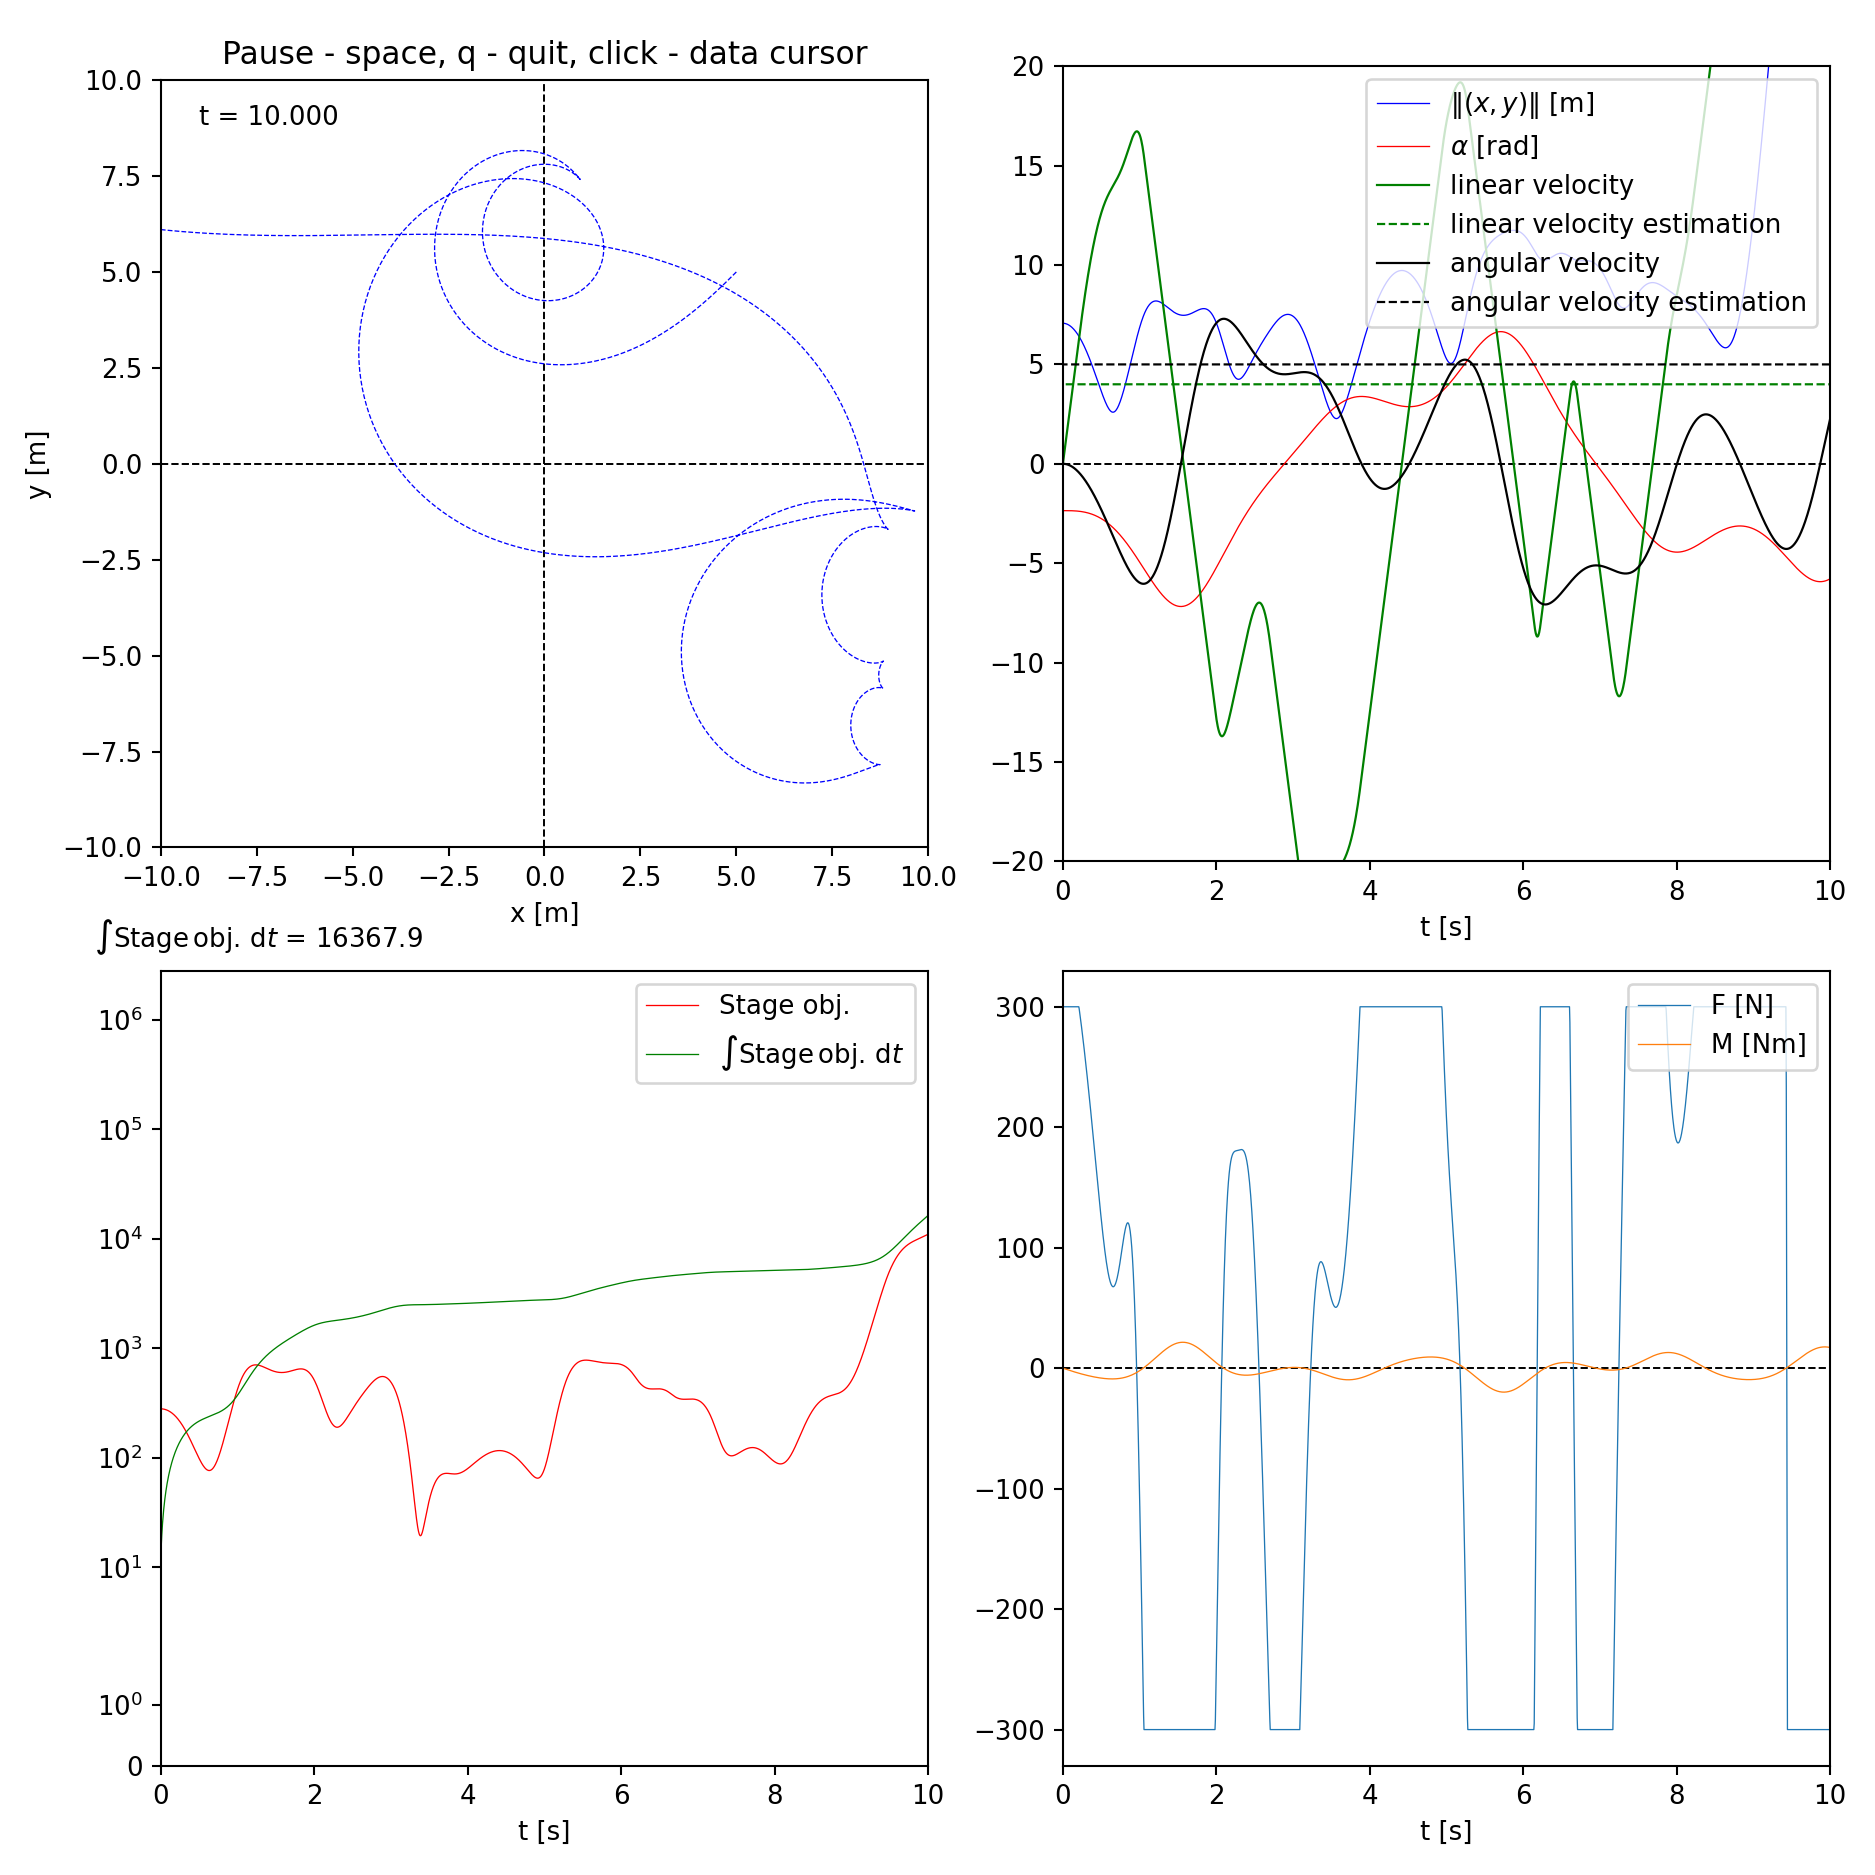

In [42]:
globals().update(vars(extras.update_globals_for_test()))

state_full_init = my_simulator.state_full

my_animator = visuals.Animator3WRobot(objects=(my_simulator,
                                                 my_sys,
                                                 my_state_estimator,
                                                 my_ctrl_nominal,
                                                 my_ctrl_benchm,
                                                 datafiles,
                                                 controllers.ctrl_selector,
                                                 my_logger),
                                        pars=(state_init,
                                              action_init,
                                              t0,
                                              t1,
                                              state_full_init,
                                              state_full_init + np.random.randint(1,8,5)*1e-1,
                                              xMin,
                                              xMax,
                                              yMin,
                                              yMax,
                                              ctrl_mode,
                                              action_manual,
                                              Fmin,
                                              Mmin,
                                              Fmax,
                                              Mmax,
                                              Nruns,
                                                is_print_sim_step, is_log_data, 0, []))

anm = animation.FuncAnimation(my_animator.fig_sim,
                              my_animator.animate,
                              init_func=my_animator.init_anim,
                              blit=False, interval=dt/1e6, repeat=False)

my_animator.get_anm(anm)

cId = my_animator.fig_sim.canvas.mpl_connect('key_press_event', lambda event: on_key_press(event, anm))

anm.running = True

my_animator.fig_sim.tight_layout()

plt.show()

In [5]:
state_init

array([ 5.        ,  5.        , -2.35619449,  0.        ,  0.        ])